In [3]:
import numpy as np

import time
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import itertools
from IPython.display import Markdown, display

from z3 import *

In [7]:
# More z3 practice. Not elegant but works

url='https://www.janestreet.com/puzzles/number-cross-2-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
y =[text for text in soup.body.stripped_strings]

#display([(i,j) for i,j in enumerate(y)])
display(Markdown("### "+y[7]+"\n"+"\n\n".join(y[10:12])))

### Number Cross 2
Fill the cells in this crossword with the digits 1 through 9 (no zeroes). Each
clue in this crossword represents either the sum of the digits or the product of
the digits in its corresponding answer — it’s up to you to decide which. The
clue could potentially represent both the sum and the product, if the sum and
product are the same. Digits can be repeated within an answer, and answers can
be repeated in the grid.

As your answer, submit the sum of all of the digits you entered into the
completed grid.

<img src="https://www.janestreet.com/puzzles/number_crossword_2.png" width="350">

Solved in 8.0871 seconds

Solution is : 276
Solved Grid
~~~~~~~~~~~


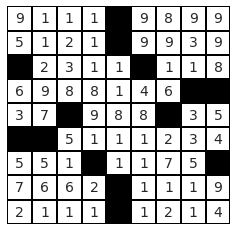

In [9]:
start = time.time()
r=[]

######################################################
# Setup # 9x9 matrix of integer variables and solver #
######################################################
X = [[Int("x_%s_%s" % (i+1, j+1)) for j in range(9) ] for i in range(9)]

s = Solver()

###################
# The constraints #
###################

# each cell contains a value in {0, ..., 9}
s += [And(1 <= X[i][j], X[i][j] <= 9) for i in range(9) for j in range(9)]

#1 across
s.add(Or
      (X[0][0]+X[0][1]+X[0][2]+X[0][3]==9,
       X[0][0]*X[0][1]*X[0][2]*X[0][3]==9))

#5 across
s.add(Or
      (X[0][5]+X[0][6]+X[0][7]+X[0][8]==35,
       X[0][5]*X[0][6]*X[0][7]*X[0][8]==35))
#9 across
s.add(Or
      (X[1][0]+X[1][1]+X[1][2]+X[1][3]==10,
       X[1][0]*X[1][1]*X[1][2]*X[1][3]==10))

#10 across
s.add(Or
      (X[1][5]+X[1][6]+X[1][7]+X[1][8]==30,
       X[1][5]*X[1][6]*X[1][7]*X[1][8]==30))
#11 across
s.add(Or
      (X[2][1]+X[2][2]+X[2][3]+X[2][4]==7,
       X[2][1]*X[2][2]*X[2][3]*X[2][4]==7))

#13 across
s.add(Or
      (X[2][6]+X[2][7]+X[2][8]==10,
       X[2][6]*X[2][7]*X[2][8]==10))

#14 across
s.add(Or
      (X[3][0]+X[3][1]+X[3][2]+X[3][3]+X[3][4]+X[3][5]+X[3][6]==42,
       X[3][0]*X[3][1]*X[3][2]*X[3][3]*X[3][4]*X[3][5]*X[3][6]==42))

#16 across
s.add(Or
      (X[4][0]+X[4][1]==21,
       X[4][0]*X[4][1]==21))

#17 across
s.add(Or
      (X[4][3]+X[4][4]+X[4][5]==25,
       X[4][3]*X[4][4]*X[4][5]==25))

#18 across
s.add(Or
      (X[4][7]+X[4][8]==15,     
       X[4][7]*X[4][8]==15))

#20 across
s.add(Or
      (X[5][2]+X[5][3]+X[5][4]+X[5][5]+X[5][6]+X[5][7]+X[5][8]==120,
       X[5][2]*X[5][3]*X[5][4]*X[5][5]*X[5][6]*X[5][7]*X[5][8]==120))

#22 across
s.add(Or
      (X[6][0]+X[6][1]+X[6][2]==25,
       X[6][0]*X[6][1]*X[6][2]==25))

#24 across
s.add(Or
      (X[6][4]+X[6][5]+X[6][6]+X[6][7]==35,
       X[6][4]*X[6][5]*X[6][6]*X[6][7]==35))

#25 across
s.add(Or
      (X[7][0]+X[7][1]+X[7][2]+X[7][3]==21,
       X[7][0]*X[7][1]*X[7][2]*X[7][3]==21))

#27 across
s.add(Or
      (X[7][5]+X[7][6]+X[7][7]+X[7][8]==9,
       X[7][5]*X[7][6]*X[7][7]*X[7][8]==9))

#29 across
s.add(Or
      (X[8][0]+X[8][1]+X[8][2]+X[8][3]==5,
       X[8][0]*X[8][1]*X[8][2]*X[8][3]==5))

#30 across
s.add(Or
      (X[8][5]+X[8][6]+X[8][7]+X[8][8]==8,
       X[8][5]*X[8][6]*X[8][7]*X[8][8]==8))

### DOWN ###
#1 down
s.add(Or
      (X[0][0]+X[1][0]==45,
       X[0][0]*X[1][0]==45))

#2 down
s.add(Or
      (X[0][1]+X[1][1]+X[2][1]+X[3][1]+X[4][1]==20,
       X[0][1]*X[1][1]*X[2][1]*X[3][1]*X[4][1]==20))

#3 down
s.add(Or
      (X[0][2]+X[1][2]+X[2][2]+X[3][2]==48,
       X[0][2]*X[1][2]*X[2][2]*X[3][2]==48))

#4 down
s.add(Or
      (X[0][3]+X[1][3]+X[2][3]+X[3][3]+X[4][3]+X[5][3]==72,
       X[0][3]*X[1][3]*X[2][3]*X[3][3]*X[4][3]*X[5][3]==72))

#5 down
s.add(Or
      (X[0][5]+X[1][5]==18,
       X[0][5]*X[1][5]==18))

#6 down
s.add(Or
     (X[0][6]+X[1][6]+X[2][6]+X[3][6]==24,
      X[0][6]*X[1][6]*X[2][6]*X[3][6]==24))

#7 down
s.add(Or
      (X[0][7]+X[1][7]+X[2][7]==27,
       X[0][7]*X[1][7]*X[2][7]==27))

#8 down
s.add(Or
      (X[0][8]+X[1][8]+X[2][8]==26,
       X[0][8]*X[1][8]*X[2][8]==26))

#12 down
s.add(Or
      (X[2][4]+X[3][4]+X[4][4]+X[5][4]+X[6][4]==12,
       X[2][4]*X[3][4]*X[4][4]*X[5][4]*X[6][4]==12))

#14 down
s.add(Or
      (X[3][0]+X[4][0]==18,
       X[3][0]*X[4][0]==18))

#15 down
s.add(Or
      (X[3][5]+X[4][5]+X[5][5]+X[6][5]+X[7][5]+X[8][5]==32,
       X[3][5]*X[4][5]*X[5][5]*X[6][5]*X[7][5]*X[8][5]==32))

#18 down
s.add(Or
      (X[4][7]+X[5][7]+X[6][7]+X[7][7]+X[8][7]==45,
       X[4][7]*X[5][7]*X[6][7]*X[7][7]*X[8][7]==45))

#19 down
s.add(Or
      (X[4][8]+X[5][8]==20,
       X[4][8]*X[5][8]==20))

#20 down
s.add(Or
     (X[5][2]+X[6][2]+X[7][2]+X[8][2]==30,
      X[5][2]*X[6][2]*X[7][2]*X[8][2]==30))

#21 down
s.add(Or
     (X[5][6]+X[6][6]+X[7][6]+X[8][6]==12,
      X[5][6]*X[6][6]*X[7][6]*X[8][6]==12))

#22 down
s.add(Or
     (X[6][0]+X[7][0]+X[8][0]==70,
      X[6][0]*X[7][0]*X[8][0]==70))

#23 down
s.add(Or
     (X[6][1]+X[7][1]+X[8][1]==12,
      X[6][1]*X[7][1]*X[8][1]==12))

#26 down
s.add(Or
      (X[7][3]+X[8][3]==2,
       X[7][3]*X[8][3]==2))

#28 down
s.add(Or
      (X[7][8]+X[8][8]==36,
       X[7][8]*X[8][8]==36))

###################
# Solve and print #
###################
if s.check() == sat:
    m = s.model()
    r = [[ m.evaluate(X[i][j]).as_long() for j in range(9) ] for i in range(9)]
else:
    print("Failed")

stop = time.time()

print("Solved in {:.4f} seconds".format(stop-start))

#### set up a nice output grid
grid = np.zeros((9,9))
grid[:2,4] = 1
grid[2,5] = 1
grid[2,0] =1
grid[3,7:9] =1
grid[4,2] =1
grid[4,6] =1
grid[5,:2] =1
grid[6,3] =1
grid[6,8] =1
grid[7:9,4] =1

annot = np.array(r).copy()
annot[grid==1] = 0
print("\nSolution is :",np.sum(annot))
print("Solved Grid")
print("~~~~~~~~~~~")
annot = annot.astype('str')
annot[annot=="0"] =""
fig,ax = plt.subplots(1,1,figsize=(4,4))
ax =sns.heatmap(grid,annot=annot,cbar=False,cmap="Greys",fmt="",linewidths=1,annot_kws={"size":14},linecolor='k')
ax.axis("off")
plt.show()


In [11]:
url='https://www.janestreet.com/puzzles/number-cross-2-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
y =[text for text in soup.body.stripped_strings]

#display([(i,j) for i,j in enumerate(y)])
display(Markdown("### "+y[7]+"\n"+"\n\n".join(y[10:11])))

### Number Cross 2
The solution to this month’s puzzle is presented here, and the sum of the digits
of the grid is 276. Congratulations to all of the correct solvers, especially
Sherry Zhang, this month’s winner of a Jane Street t-shirt!

<img src="https://www.janestreet.com/puzzles/number_crossword_2_solution.png" width="300" >